In [1]:
import pandas as pd #to read data as dataframe
import numpy as np #for dataframe and list manipulation
import matplotlib.pyplot as plt #for ploting data
from sklearn.model_selection import train_test_split #to help split the dataset into training set and testing set
import datetime #to measure time
import mesuresPerformances as myapi # my api to that cantine the basic Performances mesures functions
%matplotlib inline 
#to make jupyter notbook showes matplotlib plots and histogram

# Reading the data file as dataframe

In [2]:
data = pd.read_csv('breast_cancer.csv')
data.replace('?', np.NaN,inplace=True)
data.head(25)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
5,50-59,premeno,25-29,3-5,no,2,right,left_up,yes,no-recurrence-events
6,50-59,ge40,40-44,0-2,no,3,left,left_up,no,no-recurrence-events
7,40-49,premeno,10-14,0-2,no,2,left,left_up,no,no-recurrence-events
8,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
9,40-49,ge40,40-44,15-17,yes,2,right,left_up,yes,no-recurrence-events


# Fill in missing data

In [3]:
# checking for missing data in every attribute
pd.isnull(data).sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [4]:
# so we will replace with the mode
data['node-caps'] = data['node-caps'].replace(np.nan,data['node-caps'].mode().values[0])
data['breast-quad'] = data['breast-quad'].replace(np.nan,data['breast-quad'].mode().values[0])

In [5]:
pd.isnull(data).sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

# Partager le benchmark

In [6]:
train, test = train_test_split(data, test_size=0.2)
train_x = train.loc[:, train.columns != 'Class'].values
train_y = train['Class']

test_x = test.loc[:, train.columns != 'Class'].values
test_y = test['Class']

## re-encoding data classes

In [7]:
# to calculate the similarite and since i have Nominal and in same case Intervalle values i chose to change it into Ordinal
data['age'].replace(data['age'].sort_values().unique().tolist(),[i for i in range(data['age'].sort_values().unique().size)],inplace=True)
data['menopause'].replace(data['menopause'].sort_values().unique().tolist(),[i for i in range(data['menopause'].sort_values().unique().size)],inplace=True)
data['tumor-size'].replace(data['tumor-size'].sort_values().unique().tolist(),[i for i in range(data['tumor-size'].sort_values().unique().size)],inplace=True)
data['inv-nodes'].replace(data['inv-nodes'].sort_values().unique().tolist(),[i for i in range(data['inv-nodes'].sort_values().unique().size)],inplace=True)
data['node-caps'].replace(data['node-caps'].sort_values().unique().tolist(),[i for i in range(data['node-caps'].sort_values().unique().size)],inplace=True)
data['breast'].replace(data['breast'].sort_values().unique().tolist(),[i for i in range(data['breast'].sort_values().unique().size)],inplace=True)
data['breast-quad'].replace(data['breast-quad'].sort_values().unique().tolist(),[i for i in range(data['breast-quad'].sort_values().unique().size)],inplace=True)
data['irradiat'].replace(data['irradiat'].sort_values().unique().tolist(),[i for i in range(data['irradiat'].sort_values().unique().size)],inplace=True)
data['Class'].replace(data['Class'].sort_values().unique().tolist(),[i for i in range(data['Class'].sort_values().unique().size)],inplace=True)
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,2,2,2,0,1,3,1,2,0,1
1,3,0,2,0,0,1,1,0,0,0
2,3,0,6,0,0,2,0,1,0,1
3,2,2,6,0,1,3,1,1,1,0
4,2,2,5,4,1,2,0,4,0,1


KNN

In [9]:
train, test = train_test_split(data, test_size=0.2)
train_x = train.loc[:, train.columns != 'Class'].values
train_y = train['Class']

test_x = test.loc[:, train.columns != 'Class'].values
test_y = test['Class']

recall_l_knn = []
accuracy_l_knn = []
error_l_knn = []
precison_l_knn = []
f_score_l_knn = []
list_of_val = [3,5,7,9,11]
print('[TP,FN,FP,TN]')
for i in list_of_val:   
    knn = myapi.KNN(i,train_x,train_y)
    test['predicted'] = knn.predict(test_x)
    mtx = [] 
    mtx = myapi.matrice_confusion(test,labels=[0,1],class_labl='Class',prd_labbl='predicted',binary=True) 
    print(mtx)
    recall_l_knn.append(myapi.recall(mtx))
    accuracy_l_knn.append(myapi.accuracy(mtx))
    error_l_knn.append(myapi.error(mtx))
    precison_l_knn.append(myapi.precison(mtx))
    f_score_l_knn.append(myapi.f_score(mtx)) 
    test.drop('predicted', axis=1, inplace=True)

print(f'recall: {recall_l_knn}')
print(f'accuracy: {accuracy_l_knn}')
print(f'error: {error_l_knn}')
print(f'precison: {precison_l_knn}')
print(f'f_score {f_score_l_knn}')

[TP,FN,FP,TN]
[3, 11, 8, 36]
[3, 11, 6, 38]
[4, 10, 6, 38]
[2, 12, 7, 37]
[5, 9, 5, 39]
recall: [0.21428571428571427, 0.21428571428571427, 0.2857142857142857, 0.14285714285714285, 0.35714285714285715]
accuracy: [0.6724137931034483, 0.7068965517241379, 0.7241379310344828, 0.6724137931034483, 0.7586206896551724]
error: [0.3275862068965517, 0.2931034482758621, 0.27586206896551724, 0.3275862068965517, 0.24137931034482762]
precison: [0.2727272727272727, 0.3333333333333333, 0.4, 0.2222222222222222, 0.5]
f_score [0.23999999999999996, 0.2608695652173913, 0.3333333333333333, 0.17391304347826086, 0.41666666666666663]


Text(0, 0.5, 'Performance metrics')

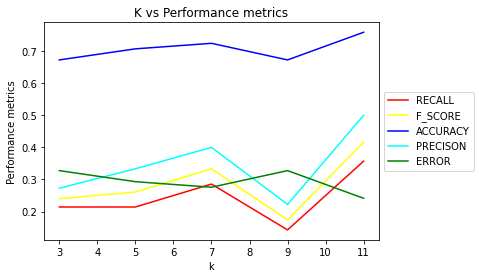

In [10]:
plt.plot(list_of_val, recall_l_knn,color='red',label = "RECALL")
plt.plot(list_of_val, f_score_l_knn,color='yellow',label = "F_SCORE")
plt.plot(list_of_val, accuracy_l_knn,color='blue',label = "ACCURACY")
plt.plot(list_of_val, precison_l_knn,color='cyan',label = "PRECISON")
plt.plot(list_of_val, error_l_knn,color='green',label = "ERROR")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(label='K vs Performance metrics')
plt.xlabel(xlabel='k')
plt.ylabel(ylabel='Performance metrics')

[Text(0.5, 0, 'nb instan'), Text(0, 0.5, 'time(s)')]

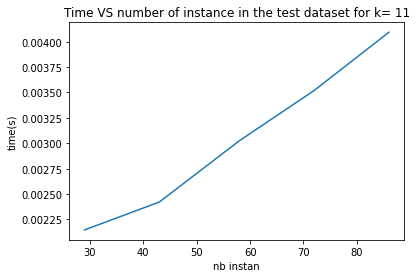

In [12]:
time_l_knn = []
nb_inst = []
k = 11
i = 10
while i<31:
    train, test = train_test_split(data, test_size=i/100)
    train_x = train.loc[:, train.columns != 'Class'].values
    train_y = train['Class']

    test_x = test.loc[:, train.columns != 'Class'].values
    test_y = test['Class']
    
    nb_inst.append(test.shape[0])
    t = []
    for x in range(500):
        knn = myapi.KNN(i,train_x,train_y)
        start_time = datetime.datetime.now()  
        knn.predict(test_x)
        end_time = datetime.datetime.now()
        time_diff = (end_time - start_time).total_seconds()
        t.append(time_diff)
    
    time_l_knn.append(sum(t)/len(t))
    i = i + 5


fig1, ax1 = plt.subplots()  
ax1.plot(nb_inst, time_l_knn) 
ax1.set_title('Time VS number of instance in the test dataset for k= '+str(k))
ax1.set(xlabel='nb instan', ylabel='time(s)')

# Naive-bayes


In [13]:
import weka.core.jvm as jvm
try:
    jvm.start()
except Exception as e:
    print(e)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\yacin\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\yacin\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\yacin\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\yacin\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\yacin\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [14]:
data = pd.read_csv('breast_cancer.csv')
data.replace('?', np.NaN,inplace=True)
# so we will replace with the mode
data['node-caps'] = data['node-caps'].replace(np.nan,data['node-caps'].mode().values[0])
data['breast-quad'] = data['breast-quad'].replace(np.nan,data['breast-quad'].mode().values[0])

In [30]:
recall_l_nb = []
accuracy_l_nb = []
error_l_nb = []
precison_l_nb = []
f_score_l_nb = []
nb_inst = []
time_l_nb = []
i = 10
print('[TP,FN,FP,TN]')
while i<31:
    train, test = train_test_split(data, test_size=i/100)    
    nb_inst.append(test.shape[0])
  
    nb = myapi.NB()
    nb.fit(train)
    start_time = datetime.datetime.now()   
    test['predicted'] = nb.predict(test)
    end_time = datetime.datetime.now()
    time_diff = (end_time - start_time).total_seconds()
    time_l_nb.append(time_diff)
    mtx = [] 
    mtx = myapi.matrice_confusion(test,test['Class'].sort_values().unique().tolist(),class_labl='Class',prd_labbl='predicted',binary=True) 
    print(mtx)
    recall_l_nb.append(myapi.recall(mtx))
    accuracy_l_nb.append(myapi.accuracy(mtx))
    error_l_nb.append(myapi.error(mtx))
    precison_l_nb.append(myapi.precison(mtx))
    f_score_l_nb.append(myapi.f_score(mtx)) 
    test.drop('predicted', axis=1, inplace=True)
    i = i + 5

print(f'recall: {recall_l_nb}')
print(f'accuracy: {accuracy_l_nb}')
print(f'error: {error_l_nb}')
print(f'precison: {precison_l_nb}')
print(f'f_score {f_score_l_nb}')

[TP,FN,FP,TN]
[6, 3, 3, 17]
[9, 3, 12, 19]
[9, 6, 11, 32]
[7, 12, 6, 47]
[18, 13, 25, 30]
recall: [0.6666666666666666, 0.75, 0.6, 0.3684210526315789, 0.5806451612903226]
accuracy: [0.7931034482758621, 0.6511627906976745, 0.7068965517241379, 0.75, 0.5581395348837209]
error: [0.2068965517241379, 0.34883720930232553, 0.2931034482758621, 0.25, 0.4418604651162791]
precison: [0.6666666666666666, 0.42857142857142855, 0.45, 0.5384615384615384, 0.4186046511627907]
f_score [0.6666666666666666, 0.5454545454545454, 0.5142857142857143, 0.4375, 0.4864864864864865]


Text(0, 0.5, 'Performance metrics')

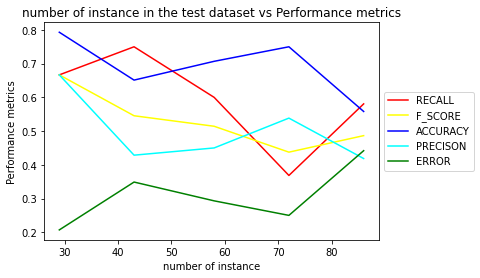

In [35]:
plt.plot(nb_inst, recall_l_nb,color='red',label = "RECALL")
plt.plot(nb_inst, f_score_l_nb,color='yellow',label = "F_SCORE")
plt.plot(nb_inst, accuracy_l_nb,color='blue',label = "ACCURACY")
plt.plot(nb_inst, precison_l_nb,color='cyan',label = "PRECISON")
plt.plot(nb_inst, error_l_nb,color='green',label = "ERROR")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(label='number of instance in the test dataset vs Performance metrics')
plt.xlabel(xlabel='number of instance')
plt.ylabel(ylabel='Performance metrics')

## l’arbre de décision

In [32]:
data = pd.read_csv('breast_cancer.csv')
data.replace('?', np.NaN,inplace=True)
# so we will replace with the mode
data['node-caps'] = data['node-caps'].replace(np.nan,data['node-caps'].mode().values[0])
data['breast-quad'] = data['breast-quad'].replace(np.nan,data['breast-quad'].mode().values[0])

In [33]:
recall_l_c45 = []
accuracy_l_c45 = []
error_l_c45 = []
precison_l_c45 = []
f_score_l_c45 = []
nb_inst = []
time_l_c45 = []
i = 10
print('[TP,FN,FP,TN]')
while i<31:
    train, test = train_test_split(data, test_size=i/100)    
    nb_inst.append(test.shape[0])
    nb = myapi.C45()
    nb.fit(train)
    start_time = datetime.datetime.now()  
    test['predicted'] = nb.predict(test)
    end_time = datetime.datetime.now()
    time_diff = (end_time - start_time).total_seconds()
    time_l_c45.append(time_diff)
    mtx = [] 
    mtx = myapi.matrice_confusion(test,test['Class'].sort_values().unique().tolist(),class_labl='Class',prd_labbl='predicted',binary=True) 
    print(mtx)
    recall_l_c45.append(myapi.recall(mtx))
    accuracy_l_c45.append(myapi.accuracy(mtx))
    error_l_c45.append(myapi.error(mtx))
    precison_l_c45.append(myapi.precison(mtx))
    f_score_l_c45.append(myapi.f_score(mtx)) 
    test.drop('predicted', axis=1, inplace=True)
    i = i + 5

print(f'recall: {recall_l_c45}')
print(f'accuracy: {accuracy_l_c45}')
print(f'error: {error_l_c45}')
print(f'precison: {precison_l_c45}')
print(f'f_score {f_score_l_c45}')

[TP,FN,FP,TN]
[2, 7, 3, 17]
[4, 7, 5, 27]
[10, 3, 44, 1]
[10, 13, 6, 43]
[6, 15, 1, 64]
recall: [0.2222222222222222, 0.36363636363636365, 0.7692307692307693, 0.43478260869565216, 0.2857142857142857]
accuracy: [0.6551724137931034, 0.7209302325581395, 0.1896551724137931, 0.7361111111111112, 0.813953488372093]
error: [0.3448275862068966, 0.2790697674418605, 0.8103448275862069, 0.26388888888888884, 0.18604651162790697]
precison: [0.4, 0.4444444444444444, 0.18518518518518517, 0.625, 0.8571428571428571]
f_score [0.2857142857142857, 0.39999999999999997, 0.29850746268656714, 0.5128205128205128, 0.42857142857142855]


Text(0, 0.5, 'Performance metrics')

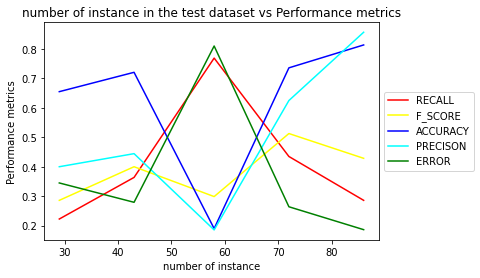

In [36]:
plt.plot(nb_inst, recall_l_c45,color='red',label = "RECALL")
plt.plot(nb_inst, f_score_l_c45,color='yellow',label = "F_SCORE")
plt.plot(nb_inst, accuracy_l_c45,color='blue',label = "ACCURACY")
plt.plot(nb_inst, precison_l_c45,color='cyan',label = "PRECISON")
plt.plot(nb_inst, error_l_c45,color='green',label = "ERROR")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(label='number of instance in the test dataset vs Performance metrics')
plt.xlabel(xlabel='number of instance')
plt.ylabel(ylabel='Performance metrics')

## Time vs nb inst for all algo

Text(0, 0.5, 'Time(s)')

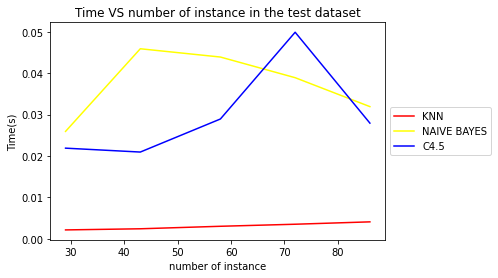

In [38]:
plt.plot(nb_inst, time_l_knn,color='red',label = "KNN")
plt.plot(nb_inst, time_l_nb,color='yellow',label = "NAIVE BAYES")
plt.plot(nb_inst, time_l_c45,color='blue',label = "C4.5")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(label='Time VS number of instance in the test dataset')
plt.xlabel(xlabel='number of instance')
plt.ylabel(ylabel='Time(s)')

Text(0, 0.5, 'recall')

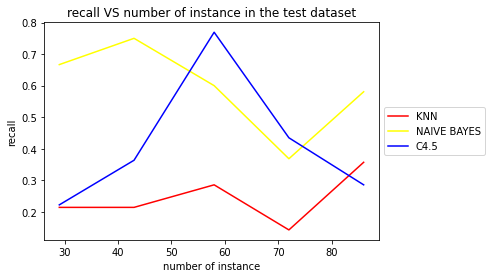

In [39]:
plt.plot(nb_inst, recall_l_knn,color='red',label = "KNN")
plt.plot(nb_inst, recall_l_nb,color='yellow',label = "NAIVE BAYES")
plt.plot(nb_inst, recall_l_c45,color='blue',label = "C4.5")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(label='recall VS number of instance in the test dataset')
plt.xlabel(xlabel='number of instance')
plt.ylabel(ylabel='recall')

Text(0, 0.5, 'accuracy')

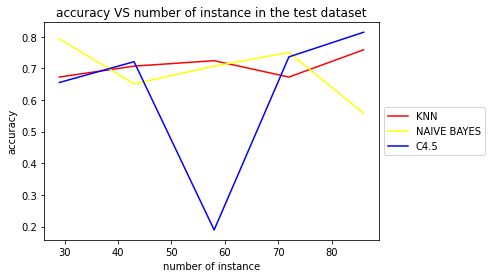

In [41]:
plt.plot(nb_inst,accuracy_l_knn,color='red',label = "KNN")
plt.plot(nb_inst,accuracy_l_nb,color='yellow',label = "NAIVE BAYES")
plt.plot(nb_inst,accuracy_l_c45,color='blue',label = "C4.5")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(label='accuracy VS number of instance in the test dataset')
plt.xlabel(xlabel='number of instance')
plt.ylabel(ylabel='accuracy')

Text(0, 0.5, 'error')

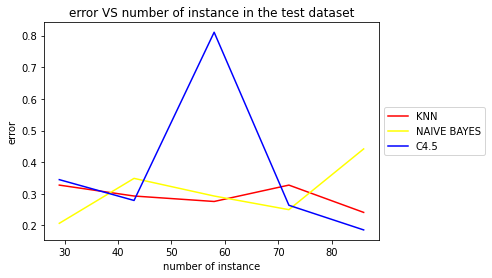

In [42]:
plt.plot(nb_inst,error_l_knn,color='red',label = "KNN")
plt.plot(nb_inst,error_l_nb,color='yellow',label = "NAIVE BAYES")
plt.plot(nb_inst,error_l_c45,color='blue',label = "C4.5")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(label='error VS number of instance in the test dataset')
plt.xlabel(xlabel='number of instance')
plt.ylabel(ylabel='error')

Text(0, 0.5, 'precison')

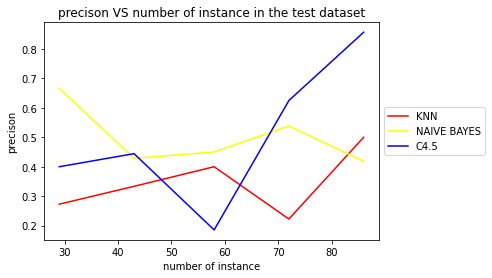

In [43]:
plt.plot(nb_inst,precison_l_knn,color='red',label = "KNN")
plt.plot(nb_inst,precison_l_nb,color='yellow',label = "NAIVE BAYES")
plt.plot(nb_inst,precison_l_c45,color='blue',label = "C4.5")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(label='precison VS number of instance in the test dataset')
plt.xlabel(xlabel='number of instance')
plt.ylabel(ylabel='precison')

Text(0, 0.5, 'f_score')

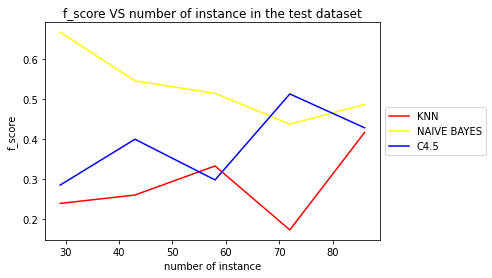

In [44]:
plt.plot(nb_inst,f_score_l_knn,color='red',label = "KNN")
plt.plot(nb_inst,f_score_l_nb,color='yellow',label = "NAIVE BAYES")
plt.plot(nb_inst,f_score_l_c45,color='blue',label = "C4.5")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(label='f_score VS number of instance in the test dataset')
plt.xlabel(xlabel='number of instance')
plt.ylabel(ylabel='f_score')